In [1]:
from image_ops import Dataset_Operations
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from clustering import k_means
data = np.load("big_baseline.npy")[:4000]

/usr/local/lib/python3.7/site-packages/pywt/_multilevel.py:45: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))
  0%|          | 0/40 [00:00<?, ?it/s]

[3722, 1775, 3604, 2181, 346, 3101, 2811, 664, 3009, 887, 1313, 2799, 3609, 994, 338, 1772, 132, 2839, 1867, 1073, 3182, 42, 888, 1325, 2829, 2238, 1023, 1007, 3679, 2684, 2642, 2763, 1715, 569, 864, 1254, 2526, 1043, 982, 3213]


100%|██████████| 40/40 [2:50:47<00:00, 350.64s/it]  


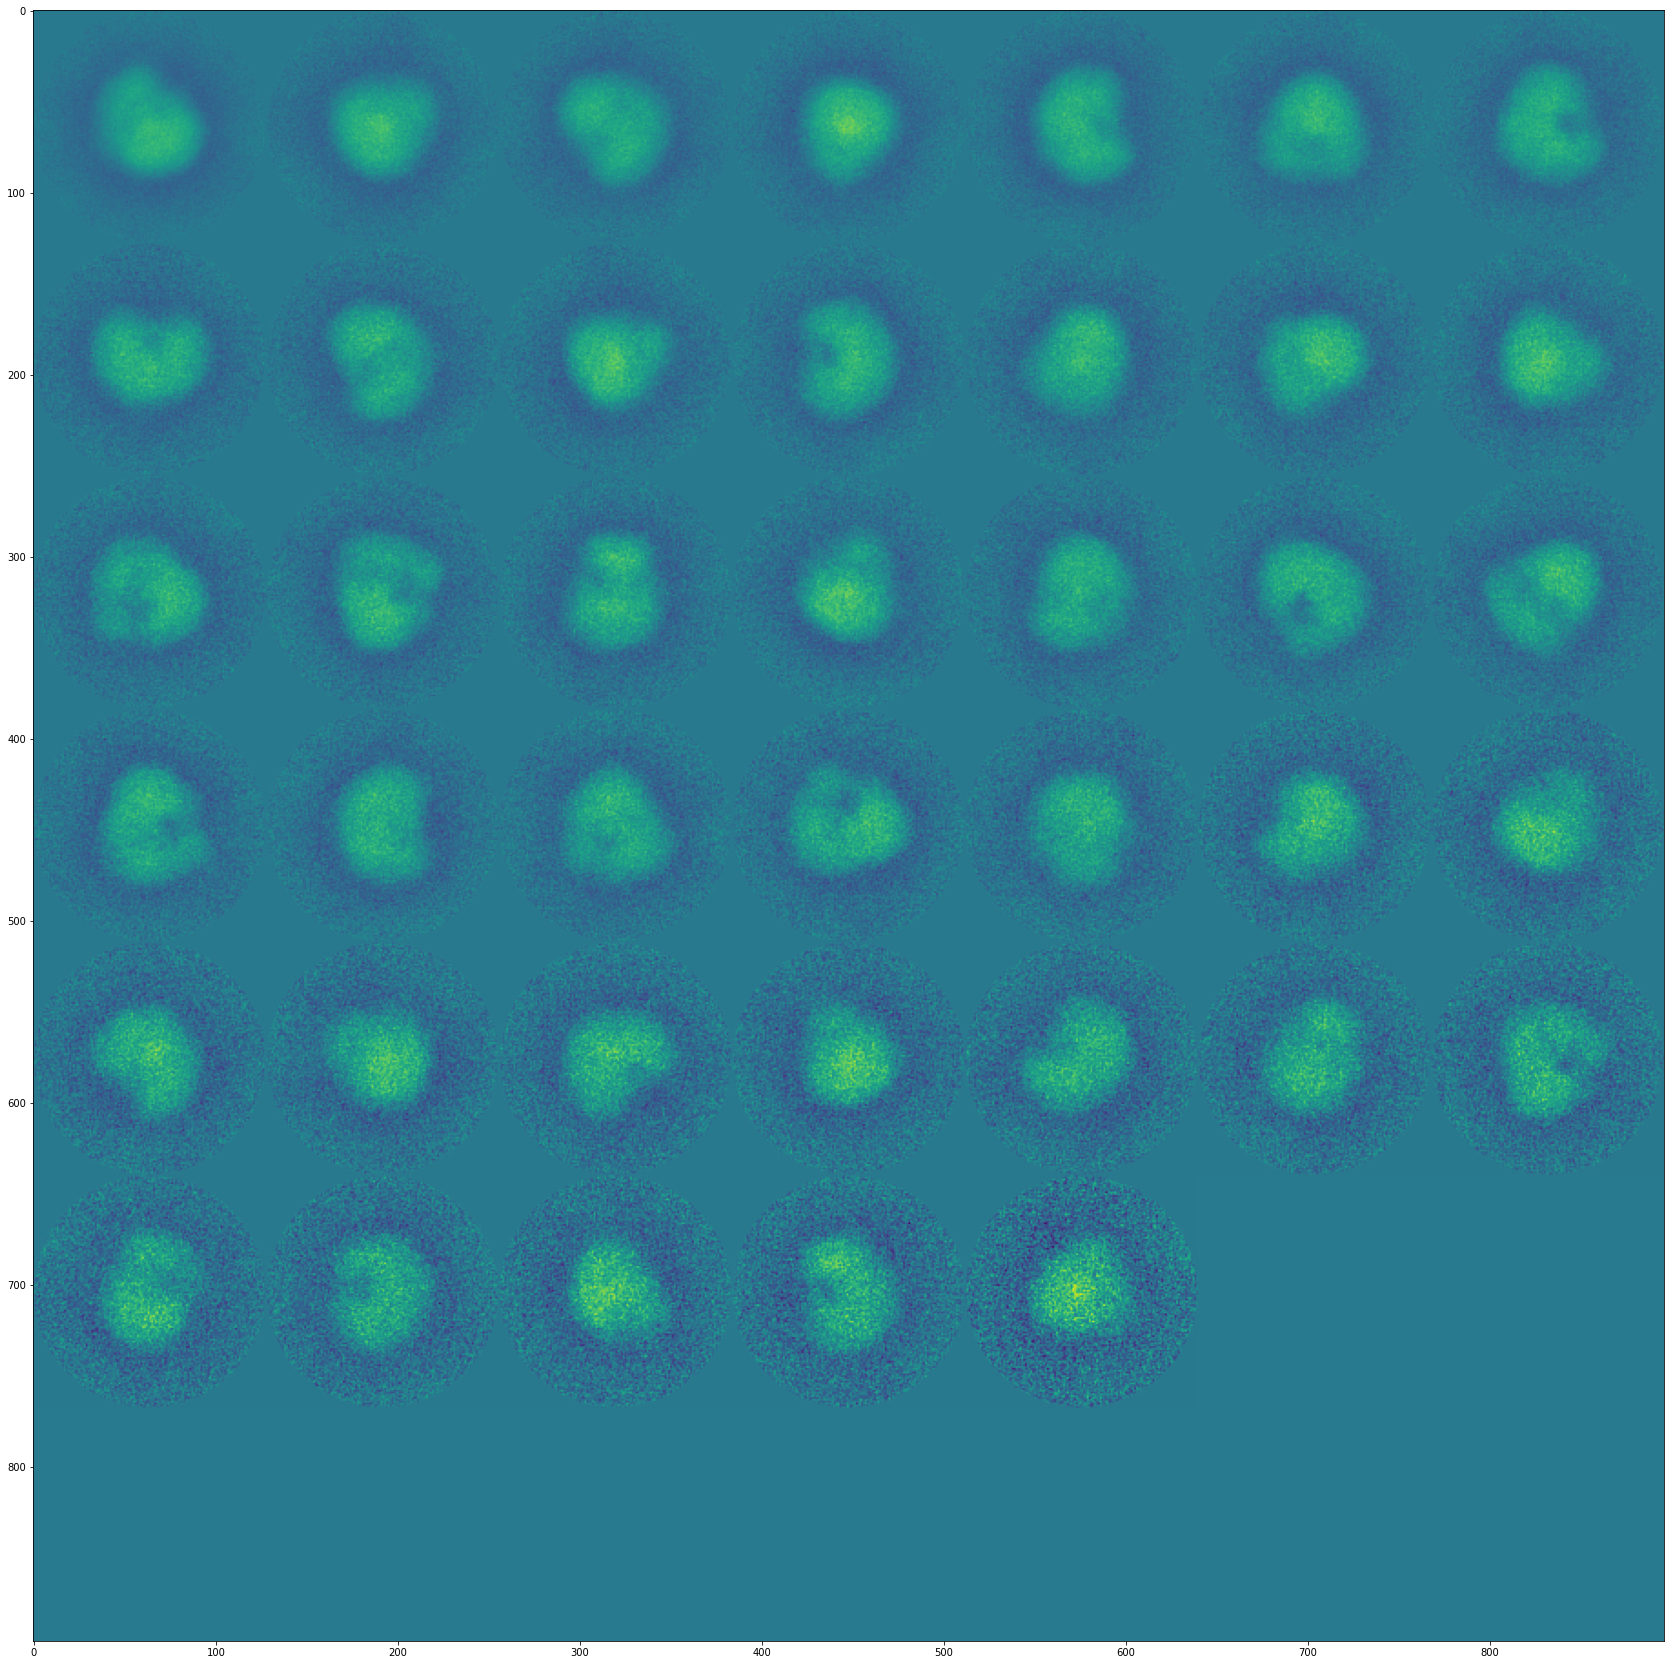

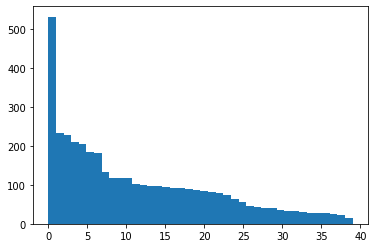

100%|██████████| 40/40 [2:42:58<00:00, 181.23s/it]  


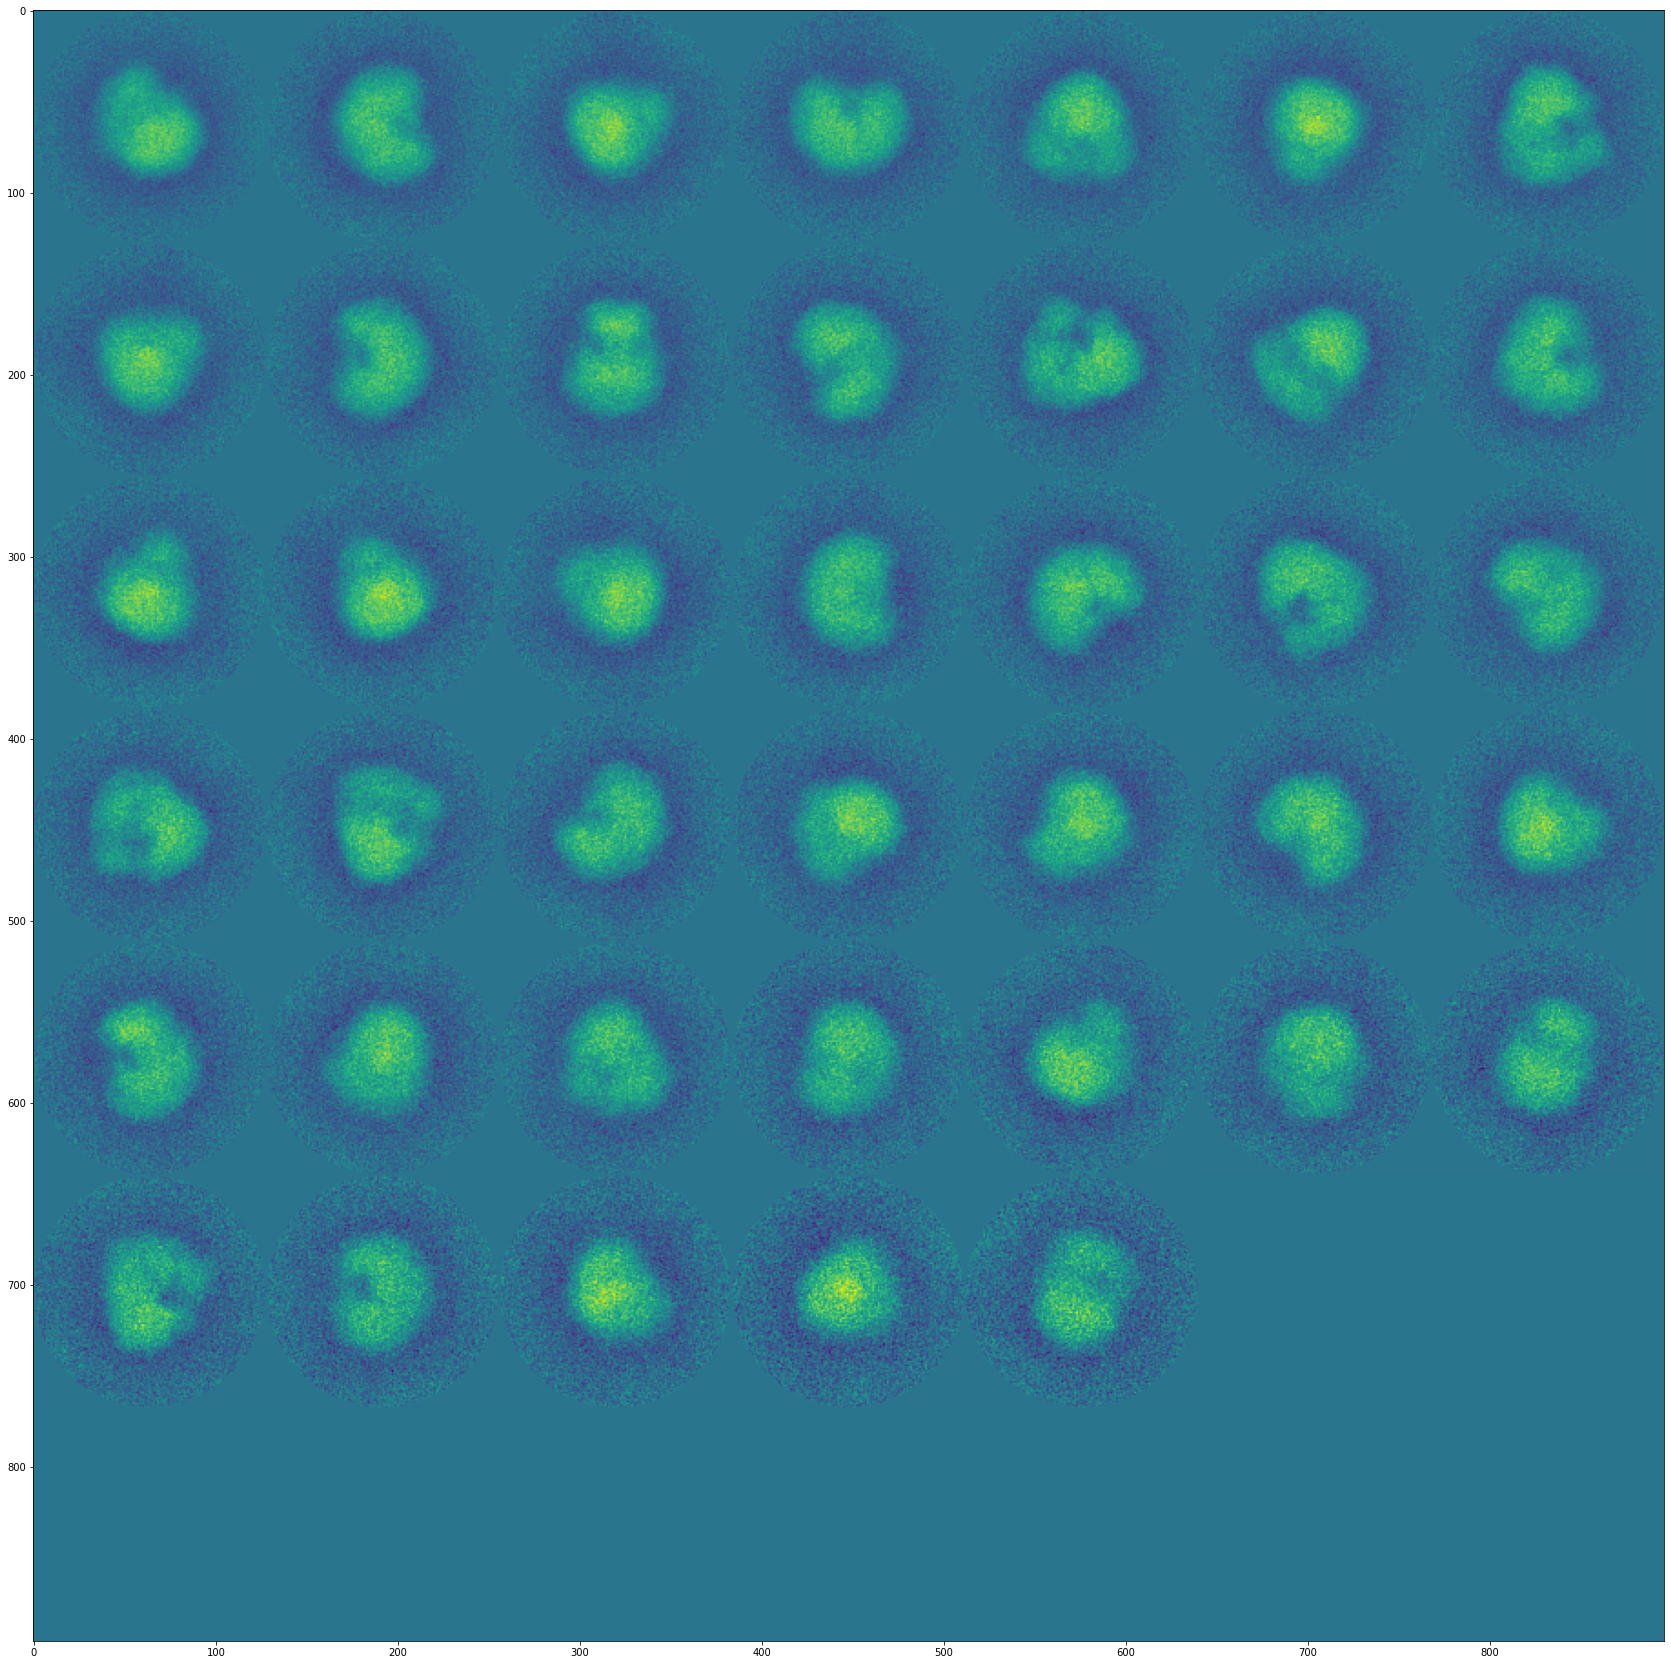

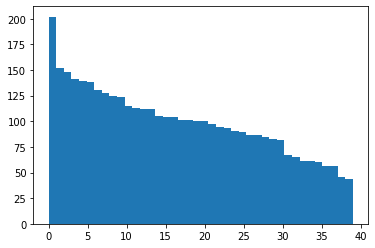

  0%|          | 0/40 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [2]:
dataset = Dataset_Operations(data, metric='wemd')
clustering = k_means(40, 100)
clustering.train(dataset, niter=5, init='k++')

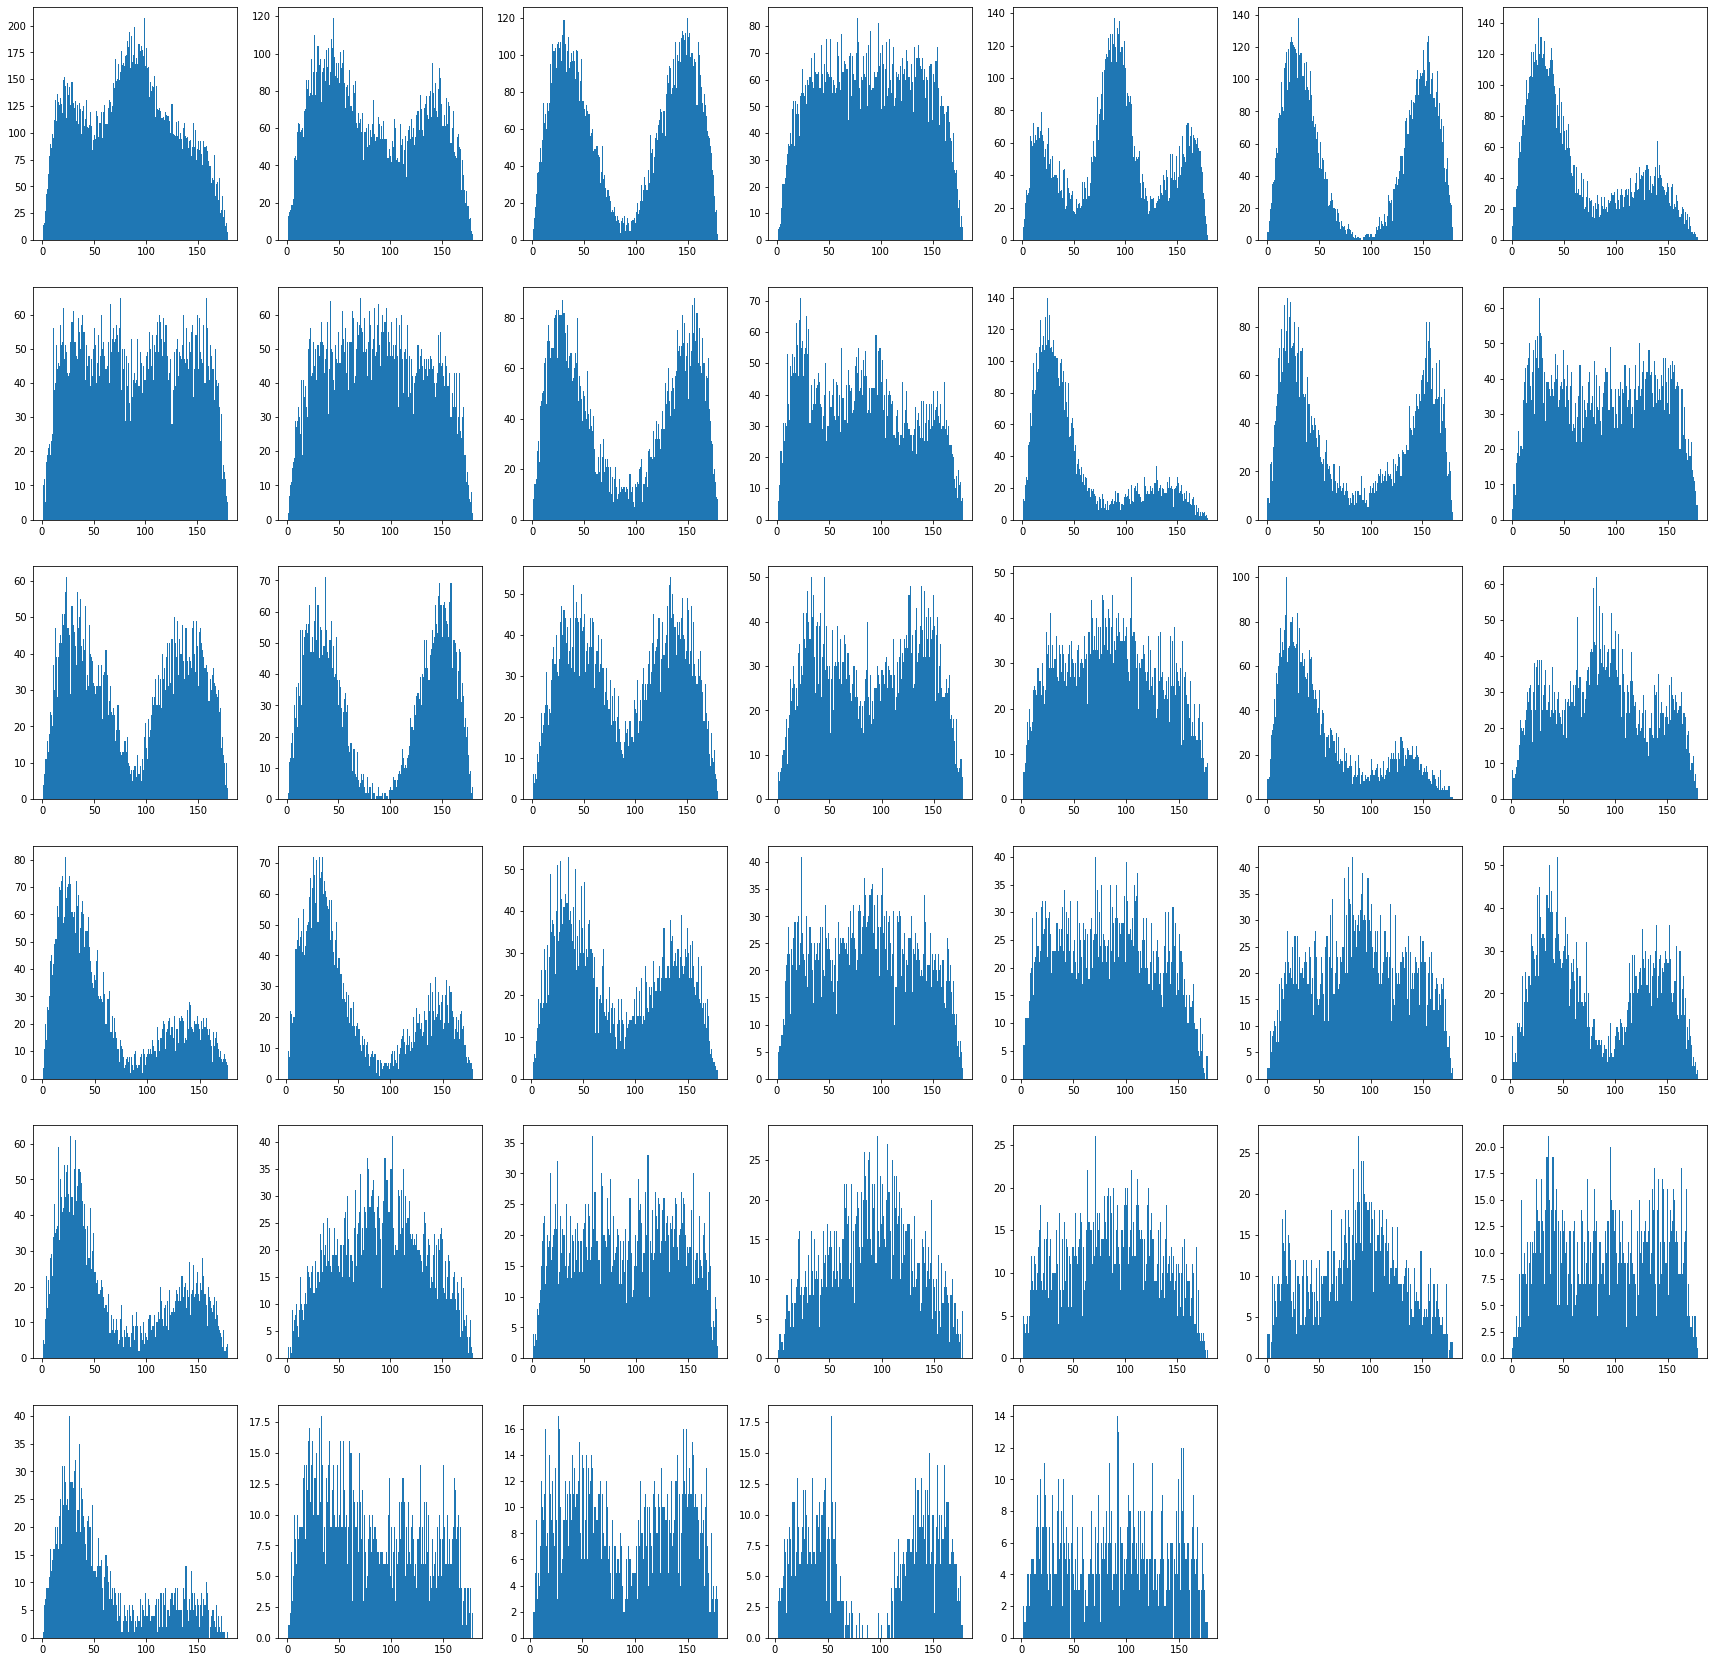

In [3]:
rotations = np.load("angles.npy")

def angle(R1, R2, mod=False):
    dot = R1.T[:,2].T @ R2.T[:,2]
    if np.abs(dot) > 1:
        dot = dot/ np.abs(dot)
    theta1 = np.arccos(dot)* (180/np.pi)
    dot = (-1*R1.T[:,2].T) @ R2.T[:,2]
    if np.abs(dot) > 1:
        dot = dot/ np.abs(dot)
    theta2 = np.arccos(dot)* (180/np.pi)
    if mod:
        return min(theta1, theta2)
    return theta1

def cluster_histogram(i, rotations, labels, mod=False):
    rots = rotations[labels == i]
    angles = []
    for i in range(len(rots)):
        for j in range(i+1, len(rots)):
            angles.append(angle(rots[i], rots[j], mod))
    return angles

def plot_histograms(hists):
    fig = plt.figure(figsize=(30,30))
    n = len(hists)
    cols = 7
    rows = np.ceil(n/7)
    for i, hist in enumerate(hists):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.hist(hist, bins=180)
    plt.show()
    
    
def ordered_plot(labels, histograms):
    counts = dict()
    for label in labels:
        counts[label] = counts[label] + 1 if label in counts else 1
    counts = [(label, counts[label]) for label in counts]
    hist_counts = [(histograms[int(label[0])], label[1]) for label in counts]
    sorted_hists = sorted(hist_counts, key=lambda x:x[1], reverse=True)
    sorted_hists = [h[0] for h in sorted_hists]
    plot_histograms(sorted_hists)
        

emd_metrics = [cluster_histogram(i, rotations, clustering.labels) for i in range(40)]


ordered_plot(clustering.labels, emd_metrics)